In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from statsmodels.distributions.empirical_distribution import ECDF
import pickle
import os
from matplotlib import font_manager as fm, rcParams
import matplotlib as mpl

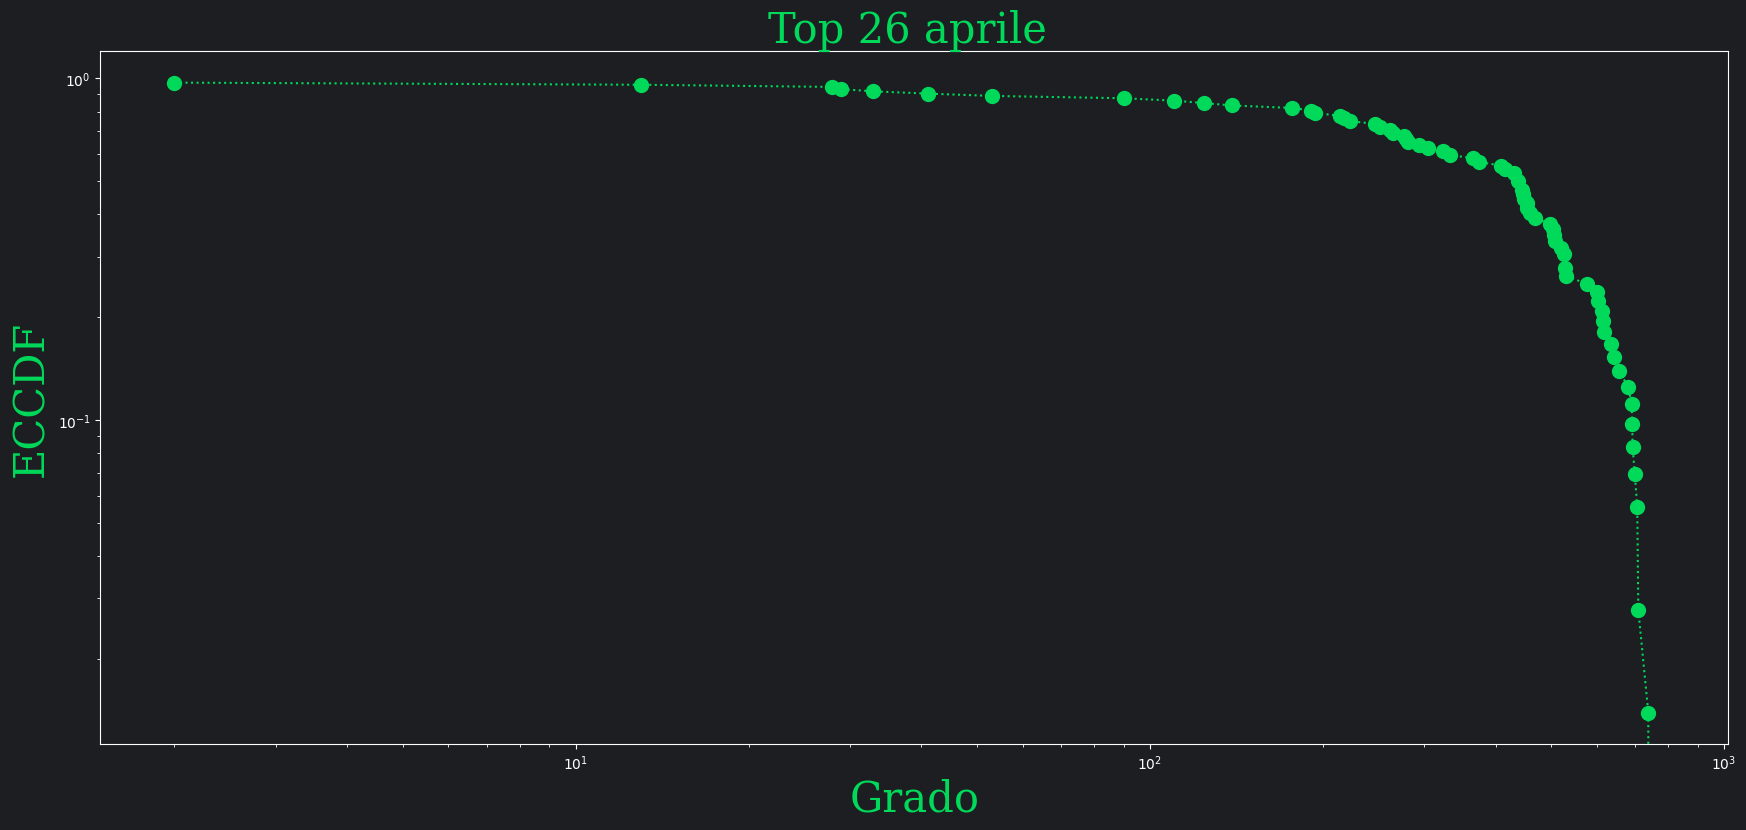

In [3]:


for z in range (15,16):
    giorno = 11
    with open(f'global{z}.pkl', 'rb') as f:
    #with open(f'viral{z}.pkl', 'rb') as f:
        grafo = pickle.load(f)
        degree = dict(grafo.degree(weight = 'weight'))
        campione_degree = list(degree.values())

        min_t = min(campione_degree)
        max_t = max(campione_degree)

        count_rete, bins_rete = np.histogram(campione_degree, bins = np.arange(min_t,max_t+2))

        pdf_rete = count_rete / grafo.order()

        cdf_fb = ECDF(campione_degree)
        x = np.unique(campione_degree)
        y = cdf_fb(x)

        # Visualizzazione
        fig_cdf_function = plt.figure(figsize=(21,9))
        fig_cdf_function.set_facecolor('#1c1e21')
        assi = fig_cdf_function.gca()
        assi.set_facecolor('#1c1e21')

        fpath = os.path.join(mpl.get_data_path(), "fonts/ttf/DejaVuSerif.ttf")
        prop = fm.FontProperties(fname=fpath)
        fname = os.path.split(fpath)[1]

        assi.set_xlabel('X-axis')
        assi.set_ylabel('Y-axis')

        assi.spines['left'].set_color('white')  
        assi.spines['right'].set_color('white')         # setting up Y-axis tick color to red
        assi.spines['top'].set_color('white')
        assi.spines['bottom'].set_color('white')   
        assi.tick_params(colors='white', which='both')

        assi.loglog(x,1-y,color = '#00d95a', linestyle = ':', marker= 'o',ms = 10)
        plt.title(f'Top {giorno+z} aprile '.format(fname), fontproperties=prop, size = 30, color='#00d95a')
        #plt.title(f'Viral {giorno+z} aprile'.format(fname), fontproperties=prop, size = 30, color='#00d95a')
        assi.set_xlabel('Grado'.format(fname), fontproperties=prop, size = 30, color='#00d95a')
        assi.set_ylabel('ECCDF'.format(fname), fontproperties=prop, size = 30, color='#00d95a')

        plt.savefig(f'global_ECDF{z}.png')
        #plt.savefig(f'viral_ECDF{z}.png')